<a href="https://colab.research.google.com/github/Mrcold2002/colab_code/blob/main/%E7%BA%BF%E6%80%A7%E5%9B%9E%E5%BD%92.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1 导入试验所需的包

In [3]:
%matplotlib inline
from IPython import display
from matplotlib import pyplot as plt
from mxnet import autograd,nd
import random

2 生成数据集合

In [29]:
num_inputs=2 #输入参数两个
num_examples=1000 # 共1000个数据
true_w=[2,-3.4]
true_b=4.2  # 真实参数
features=nd.random.normal(scale=1,shape=(num_examples,num_inputs)) # 正态分布的数据
labels=true_w[0]*features[:,0]+true_w[1]*features[:,1]+true_b # 真实标签
labels+=nd.random.normal(scale=0.01,shape=labels.shape) # 给正态分布的随机误差

In [30]:
features[0],labels[0]

(
 [ 1.2489744  -0.33277884]
 <NDArray 2 @cpu(0)>, 
 [7.833998]
 <NDArray 1 @cpu(0)>)

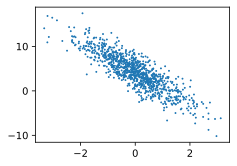

In [31]:
def use_svg_display():
  #用矢量图显示
  display.set_matplotlib_formats('svg')
def set_figsize(figsize=(3.5,2.5)):
  use_svg_display()
  # 设置图的尺寸
  plt.rcParams['figure.figsize']=figsize
set_figsize()
plt.scatter(features[:,1].asnumpy(),labels.asnumpy(),1);#加分号只显示图


3 读取数据集

In [32]:
def data_iter(batch_size,features,labels):
  # 该函数每次返回batch_size大小的随机样本的特征和标签
  num_examples=len(features)
  indices=list(range(num_examples))
  random.shuffle(indices)# 样本的读取顺序是随机的
  for i in range(0,num_examples,batch_size):
    j = nd.array(indices[i:min(i+batch_size,num_examples)])
    yield features.take(j),labels.take(j)#take函数根据索引返回对应函数

In [33]:
batch_size=10
for X,y in data_iter(batch_size,features,labels):
  print(X,y)
  break


[[ 0.2670631  -1.4775614 ]
 [ 0.4777066   0.2949508 ]
 [-1.0740983   0.96664196]
 [ 0.9747461   0.16072898]
 [ 0.31419688 -1.7751331 ]
 [-0.29868048  2.917925  ]
 [ 0.7698347  -0.47074908]
 [ 0.38828224 -0.21730624]
 [ 0.04042173  1.2426122 ]
 [-1.323248   -0.08991122]]
<NDArray 10x2 @cpu(0)> 
[ 9.747348    4.1718335  -1.2267497   5.599447   10.865407   -6.3180456
  7.3439846   5.7183204   0.05283242  1.8494893 ]
<NDArray 10 @cpu(0)>


4 初始化模型参数

In [37]:
w=nd.random.normal(scale=0.01,shape=(num_inputs,1))
b=nd.zeros(shape=(1,))

w.attach_grad()
b.attach_grad()

5 定义模型

In [18]:
def linreg(X,w,b):
  return nd.dot(X,w)+b

6 定义损失函数

In [19]:
def squared_loss(y_hat,y):
  return (y_hat-y.reshape(y_hat.shape))**2/2

7 定义优化函数

In [15]:
def sgd(params,lr,batch_size):
  for param in params:
    param[:]=param - lr * param.grad/batch_size

8 训练模型

In [39]:
lr=0.003#学习率
num_epochs=30#迭代周期
net=linreg
loss=squared_loss

for epoch in range(num_epochs):
  for X,y in data_iter(batch_size,features,labels):
    with autograd.record():
      l=loss(net(X,w,b),y)# l是有关小批量X合y的损失
    l.backward()#小批量的损失对模型参数求梯度
    sgd([w,b],lr,batch_size);#使用小批量随机梯度下降迭代模型参数
  train_l=loss(net(features,w,b),labels)
  print('epoch %d,loss %f'%(epoch+1,train_l.mean().asnumpy()))

epoch 1,loss 0.019482
epoch 2,loss 0.010558
epoch 3,loss 0.005734
epoch 4,loss 0.003126
epoch 5,loss 0.001714
epoch 6,loss 0.000951
epoch 7,loss 0.000539
epoch 8,loss 0.000316
epoch 9,loss 0.000195
epoch 10,loss 0.000129
epoch 11,loss 0.000094
epoch 12,loss 0.000074
epoch 13,loss 0.000064
epoch 14,loss 0.000058
epoch 15,loss 0.000055
epoch 16,loss 0.000053
epoch 17,loss 0.000053
epoch 18,loss 0.000052
epoch 19,loss 0.000052
epoch 20,loss 0.000052
epoch 21,loss 0.000052
epoch 22,loss 0.000052
epoch 23,loss 0.000052
epoch 24,loss 0.000052
epoch 25,loss 0.000052
epoch 26,loss 0.000052
epoch 27,loss 0.000052
epoch 28,loss 0.000052
epoch 29,loss 0.000052
epoch 30,loss 0.000052


In [21]:
true_w,w

([2, -3.4], 
 [[ 1.9999073]
  [-3.3997107]]
 <NDArray 2x1 @cpu(0)>)

In [22]:
true_b,b

(4.2, 
 [4.199877]
 <NDArray 1 @cpu(0)>)